# Complexity analysis

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [14]:
a = 1
M = 1

Narray = np.arange(1000,11000,1000)

for N in Narray:
    
    m = M/N
    
    # P(r) = 3*r^3/(a^3)
    # r(P) = a(P/3)^(1/3)

    cdf_r = np.random.uniform(0,1,N)
    r = a*(cdf_r/3)**(1/3)

    # P(theta) = (1 - cos(theta))/2
    # theta(P) = cos^(-1)(1 - 2P)

    cdf_theta = np.random.uniform(0,1,N)
    theta = np.arccos(1 - 2*cdf_theta)

    phi = np.random.uniform(0,2*np.pi,N)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta) 

    # open the file
    file = open('input%s.txt'% N, 'w')

    # write the file
    file.write(f'{N}\n')
    file.write('3\n') # dimensions
    file.write('0\n')

    for i in range(N):
        file.write(f'0.01\n')

    for i in range(N):
        file.write(f'{x[i]} {y[i]} {z[i]}\n')

    for i in range(N):
        file.write(f'{0} {0} {0}\n')


    # close the file
    file.close()

# Running the script

In [21]:
import subprocess

result = subprocess.run(['zsh', 'complexity.zsh'], stdout=subprocess.PIPE)

output = result.stdout.decode('utf-8')
print(output)

( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  1,15s user 0,05s system 99% cpu 1,203 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  3,47s user 0,06s system 99% cpu 3,539 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  6,43s user 0,06s system 99% cpu 6,491 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  9,86s user 0,08s system 99% cpu 9,949 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  13,71s user 0,08s system 99% cpu 13,800 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  17,32s user 0,08s system 99% cpu 17,411 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  22,22s user 0,10s system 99% cpu 22,321 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  26,87s user 0,12s system 99% cpu 26,993 total
( ./tree

Execution time for input1000.txt:  seconds
Execution time for input2000.txt:  seconds
Execution time for input3000.txt:  seconds
Execution time for input4000.txt:  seconds
Execution time for input5000.txt:  seconds
Execution time for input6000.txt:  seconds
Execution time for input7000.txt:  seconds
Execution time for input8000.txt:  seconds
Execution time for input9000.txt:  seconds
Execution time for input10000.txt:  seconds
Execution times written to time.out



( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  35,85s user 0,21s system 9% cpu 6:16,94 total


In [56]:
# Clearing the directory from the input and ouput files
import os

for i in Narray:
    filename1 = f'input{i}.txt'
    filename2 = f'output{i}.txt'
    if os.path.exists(filename1):
        os.remove(filename1)
    if os.path.exists(filename2):
        os.remove(filename2)

# Read data

In [35]:
# Open the .out file for reading
with open('time.txt', 'r') as f:
    # Read the lines of the file into a list
    lines = f.readlines()

# Create an empty list to store the data from the second column
data = []

# Loop over the lines of the file
for line in lines:
    # Split each line into a list of words
    words = line.split()
    # Check if the list has at least two elements
    if len(words) >= 1:
        # Convert the second element to a float, replacing comma with point if necessary
        number = float(words[0].replace(',', '.'))
        # Append the number to the data list
        data.append(number)

# Convert the data list to a numpy array
times = np.array(data)

# Close the file
f.close()

In [37]:
print(times)
print(Narray)

[ 1.15  3.47  6.43  9.86 13.71 17.32 22.22 26.87 32.06 35.85]
[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000]


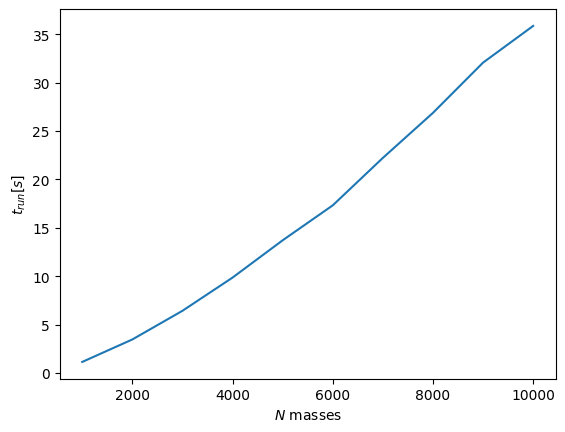

In [38]:
plt.plot(Narray, times)
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.show()

In [51]:
def fit_func(N, c, alpha,beta): 
    
    return c*N**alpha*np.log(N)+ beta

In [52]:
import scipy

params, _ = scipy.optimize.curve_fit(fit_func, Narray, times)

alpha = 1.2693409978565793


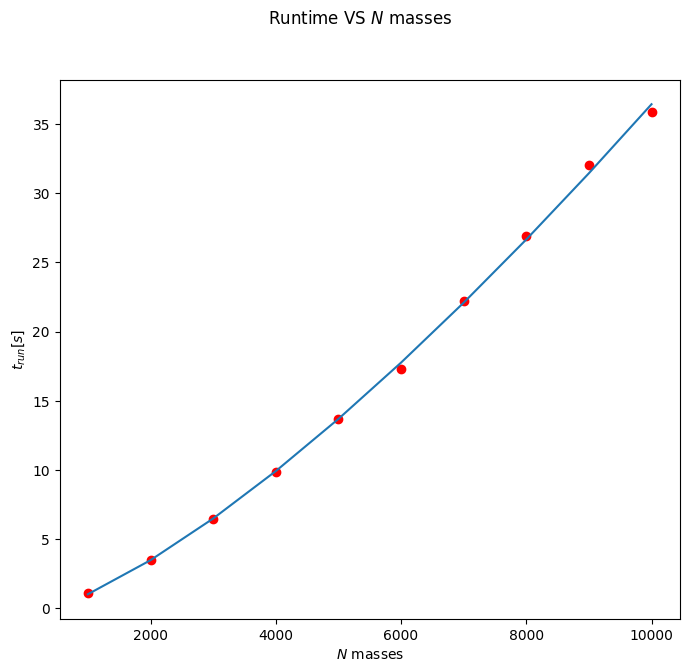

In [53]:
plt.figure(figsize = (8,7))

print("alpha =", params[1])

plt.scatter(Narray, times, c = 'r', label="results")
plt.plot(Narray, fit_func(Narray, params[0], params[1], params[2]), label="fit")
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.suptitle("Runtime VS $N$ masses")
plt.show()